# Practice Lab 3 : ANN
- Please write your name and student id everytime

###  1. Import the Dataset and Learn About the Data


In [1]:
import pandas as pd
df = pd.read_csv('lab2_dataset.csv')
df.head()

,Id,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,...,BsmtFinType1,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,Fence,SalePrice
0,1,PConc,856,Gd,0,Ex,2,Gd,61,2003.0,...,GLQ,2003,548,8,2,1710,2003,65.0,NaN,208500
1,2,CBlock,1262,TA,1,Ex,2,Gd,0,1976.0,...,ALQ,1976,460,6,2,1262,1976,80.0,NaN,181500
2,3,PConc,920,Gd,1,Ex,2,Gd,42,2001.0,...,GLQ,2001,608,6,2,1786,2002,68.0,NaN,223500
3,4,BrkTil,961,Gd,1,Gd,1,TA,35,1998.0,...,ALQ,1915,642,7,3,1717,1970,60.0,NaN,140000
4,5,PConc,1145,Gd,1,Ex,2,Gd,84,2000.0,...,GLQ,2000,836,9,3,2198,2000,84.0,NaN,250000


In [2]:
df.describe()

,Id,1stFlrSF,Fireplaces,FullBath,OpenPorchSF,GarageYrBlt,OverallQual,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000
mean,730.500000,1162.626712,0.613014,1.565068,46.660274,1978.506164,6.099315,1971.267808,472.980137,6.517808,1.767123,1515.463699,1984.865753,70.049958,180921.195890
std,421.610009,386.587738,0.644666,0.550916,66.256028,24.689725,1.382997,30.202904,213.804841,1.625393,0.747315,525.480383,20.645407,24.284752,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,1900.000000,1.000000,1872.000000,0.000000,2.000000,0.000000,334.000000,1950.000000,21.000000,34900.000000
25%,365.750000,882.000000,0.000000,1.000000,0.000000,1961.000000,5.000000,1954.000000,334.500000,5.000000,1.000000,1129.500000,1967.000000,59.000000,129975.000000
50%,730.500000,1087.000000,1.000000,2.000000,25.000000,1980.000000,6.000000,1973.000000,480.000000,6.000000,2.000000,1464.000000,1994.000000,69.000000,163000.000000
75%,1095.250000,1391.250000,1.000000,2.000000,68.000000,2002.000000,7.000000,2000.000000,576.000000,7.000000,2.000000,1776.750000,2004.000000,80.000000,214000.000000
max,1460.000000,4692.000000,3.000000,3.000000,547.000000,2010.000000,10.000000,2010.000000,1418.000000,14.000000,4.000000,5642.000000,2010.000000,313.000000,755000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 22 columns):
Id              1460 non-null int64
Foundation      1460 non-null object
1stFlrSF        1460 non-null int64
KitchenQual     1460 non-null object
Fireplaces      1460 non-null int64
HeatingQC       1460 non-null object
FullBath        1460 non-null int64
BsmtQual        1423 non-null object
OpenPorchSF     1460 non-null int64
GarageYrBlt     1379 non-null float64
ExterQual       1460 non-null object
OverallQual     1460 non-null int64
BsmtFinType1    1423 non-null object
YearBuilt       1460 non-null int64
GarageArea      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
GrLivArea       1460 non-null int64
YearRemodAdd    1460 non-null int64
LotFrontage     1201 non-null float64
Fence           281 non-null object
SalePrice       1460 non-null int64
dtypes: float64(2), int64(13), object(7)
memory usage: 251.0+ KB


In [25]:
df.columns[df.isnull().any()].tolist()

['BsmtQual', 'GarageYrBlt', 'BsmtFinType1', 'LotFrontage', 'Fence']

In [26]:
df.isnull().sum()

Id                 0
Foundation         0
1stFlrSF           0
KitchenQual        0
Fireplaces         0
HeatingQC          0
FullBath           0
BsmtQual          37
OpenPorchSF        0
GarageYrBlt       81
ExterQual          0
OverallQual        0
BsmtFinType1      37
YearBuilt          0
GarageArea         0
TotRmsAbvGrd       0
GarageCars         0
GrLivArea          0
YearRemodAdd       0
LotFrontage      259
Fence           1179
SalePrice          0
dtype: int64

###  2. Preprocessing

Use techniques that you have learned to preprocess the data. **For example**, 


In [27]:
df = df.drop(columns=['Id', 'Fence','YearRemodAdd', 'YearRemodAdd','GarageYrBlt','YearBuilt'])

In [28]:
df = df.dropna(axis=0)

In [29]:
df = pd.concat([pd.get_dummies(df.select_dtypes(include=['object'])),
                   df.select_dtypes(include=['float64','int64'])]
                   , axis=1)

In [30]:
df['Sales_bin'] = pd.qcut(df['SalePrice'], q=[0,0.5,1], labels=["Low", "High"])

In [31]:
df.Sales_bin.value_counts()

High    585
Low     585
Name: Sales_bin, dtype: int64

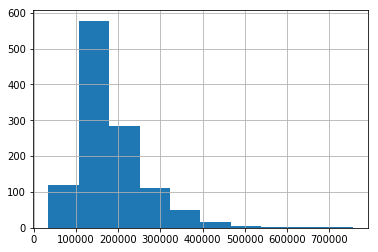

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
df['SalePrice'] .hist()

Separate feature and target

In [33]:
y = df.Sales_bin.copy()
X = df.drop(['SalePrice','Sales_bin'],axis=1).copy()

#### Transform data and Model Evaluation Method
- Split into train set and test set

In [34]:
from sklearn import preprocessing


minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_scale = minmax_scale.transform(X)

In [35]:
replace_w = {'High': 1 ,'Low':0}
y = y.replace(replace_w)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale ,y,test_size=0.2,random_state=42)

- Fit Logistic Regression model

In [37]:
from keras import models
from keras import layers

In [38]:
X_train.shape

(936, 38)

In [39]:
nn = models.Sequential()
nn.add(layers.Dense(76,activation = 'linear',input_shape=(None,38)))
nn.add(layers.Dense(1,activation = 'sigmoid'))

In [40]:
nn.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, None, 76)          2964      
_________________________________________________________________
dense_4 (Dense)              (None, None, 1)           77        
Total params: 3,041
Trainable params: 3,041
Non-trainable params: 0
_________________________________________________________________


In [43]:
import numpy as np
X_train_add = np.expand_dims(X_train, axis=0)
y_train_add = np.expand_dims(y_train, axis=0)
y_train_add = np.expand_dims(y_train_add, axis=3)

C:\Users\FongInWza2007eiei\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


In [44]:
y_train_add.shape

(1, 936, 1)

In [45]:
history = nn.fit(X_train_add,y_train_add,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 569ms/step - loss: 0.7068 - acc: 0.4263
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7004 - acc: 0.4626
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6942 - acc: 0.4915
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6881 - acc: 0.5160
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6822 - acc: 0.5545
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6764 - acc: 0.5983
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6708 - acc: 0.6271
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6652 - acc: 0.6400
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6599 - acc: 0.6549
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6546 - acc: 0.6688
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.64

1/1 [==============================] - 0s 8ms/step - loss: 0.4533 - acc: 0.8387
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4522 - acc: 0.8387
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4511 - acc: 0.8387
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4500 - acc: 0.8365
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4490 - acc: 0.8365
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4479 - acc: 0.8387
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4469 - acc: 0.8397
Epoch 96/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4459 - acc: 0.8408
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4449 - acc: 0.8397
Epoch 98/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4439 - acc: 0.8397
Epoch 99/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4430 - a

In [48]:
X_test_add = np.expand_dims(X_test, axis=0)
y_test_add = np.expand_dims(y_test, axis=0)
y_test_add = np.expand_dims(y_test_add, axis=3)

C:\Users\FongInWza2007eiei\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
test_loss, test_acc = nn.evaluate(X_test_add, y_test_add)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

1/1 [==============================] - 0s 5ms/step
Test Loss: 0.43535739183425903
Test Accuracy: 0.8205128312110901


In [ ]:
history.history